# Assignment 3(due on 11/22)

## Student:曾连荣（12332314），Gtihub：LyricZeng
## 批改人：张鹏


## 得分：55/60

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import netCDF4
from matplotlib import pyplot as plt
%matplotlib inline

## 1. Niño 3.4 index

In [2]:
da = xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc",engine='netcdf4')
da

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

 ## 1.1 Compute monthly climatology for SST from Niño 3.4 region

In [9]:
weights = np.cos(np.deg2rad(da.lat))
sst_weighted = da.sst.sel(lat=slice(-5,5),lon=slice(190,240)).weighted(weights)
region_mean = sst_weighted.mean(dim=('lon','lat'))
monthly_sst = region_mean.groupby('time.month').mean()
x = region_mean.size
anoma = np.zeros(x-2)
for i in range(0,x-2):
    k = i % 12
    anoma[i] = region_mean[i] - monthly_sst[k]
    
##  The criteria, that is often used to classify El Niño episodes, 
# is that five consecutive 3-month running mean SST anomalies exceed the threshold.
def moving_average(x,w):
    return np.convolve(x, np.ones(w),'valid') / w
mean_anomalies = moving_average(anoma,3)
mean_anomalies

# create a dataframe
# 'JFM','FMA','MAM','AMJ','MJJ','JJA','JAS','OND','NDJ','DJF'
alist = ['JFM','FMA','MAM','AMJ','MJJ','JJA','JAS','OND','NDJ','DJF']
templist=[]
for i in range(0,68):
    for j in range(0,10):
        templist.append(alist[j])
templist.append('JFM')
templist.append('FMA')
df = pd.DataFrame(mean_anomalies,columns=['mean_3_anomalies'])
df['mo'] = pd.DataFrame(templist)
df['date'] = pd.DataFrame(da.time.values)
sub = np.zeros(680)
df

mean_3_anomalies   mo       date
0           -0.352137  JFM 1960-01-15
1           -0.307922  FMA 1960-02-15
2           -0.210944  MAM 1960-03-15
3           -0.240803  AMJ 1960-04-15
4           -0.225803  MJJ 1960-05-15
..                ...  ...        ...
675          0.500899  JJA 2016-04-15
676         -0.072016  JAS 2016-05-15
677         -0.442696  OND 2016-06-15
678         -0.618628  NDJ 2016-07-15
679         -0.728378  DJF 2016-08-15

[680 rows x 3 columns]

## 1.2 Visualize the computed Niño 3.4

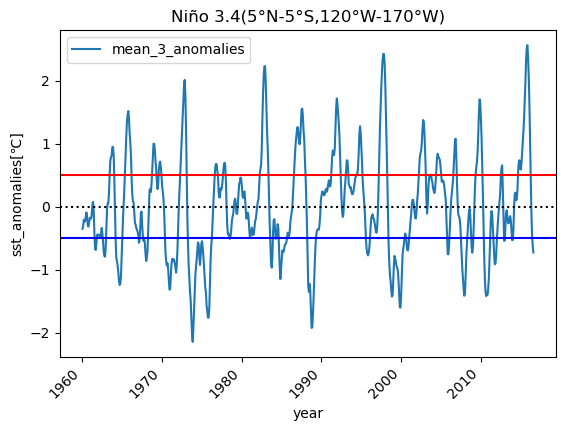

In [10]:
df.plot(x="date",y="mean_3_anomalies")
plt.axhline(y=0.5,ls="-",c="red")#添加水平直线
plt.axhline(y=0,ls=":",c="black")#添加水平直线
plt.axhline(y=-0.5,ls="-",c="blue")#添加水平直线
plt.xticks(rotation=45)
plt.ylabel('sst_anomalies[℃]')
plt.xlabel('year')
plt.title('Niño 3.4(5°N-5°S,120°W-170°W)')
plt.show()

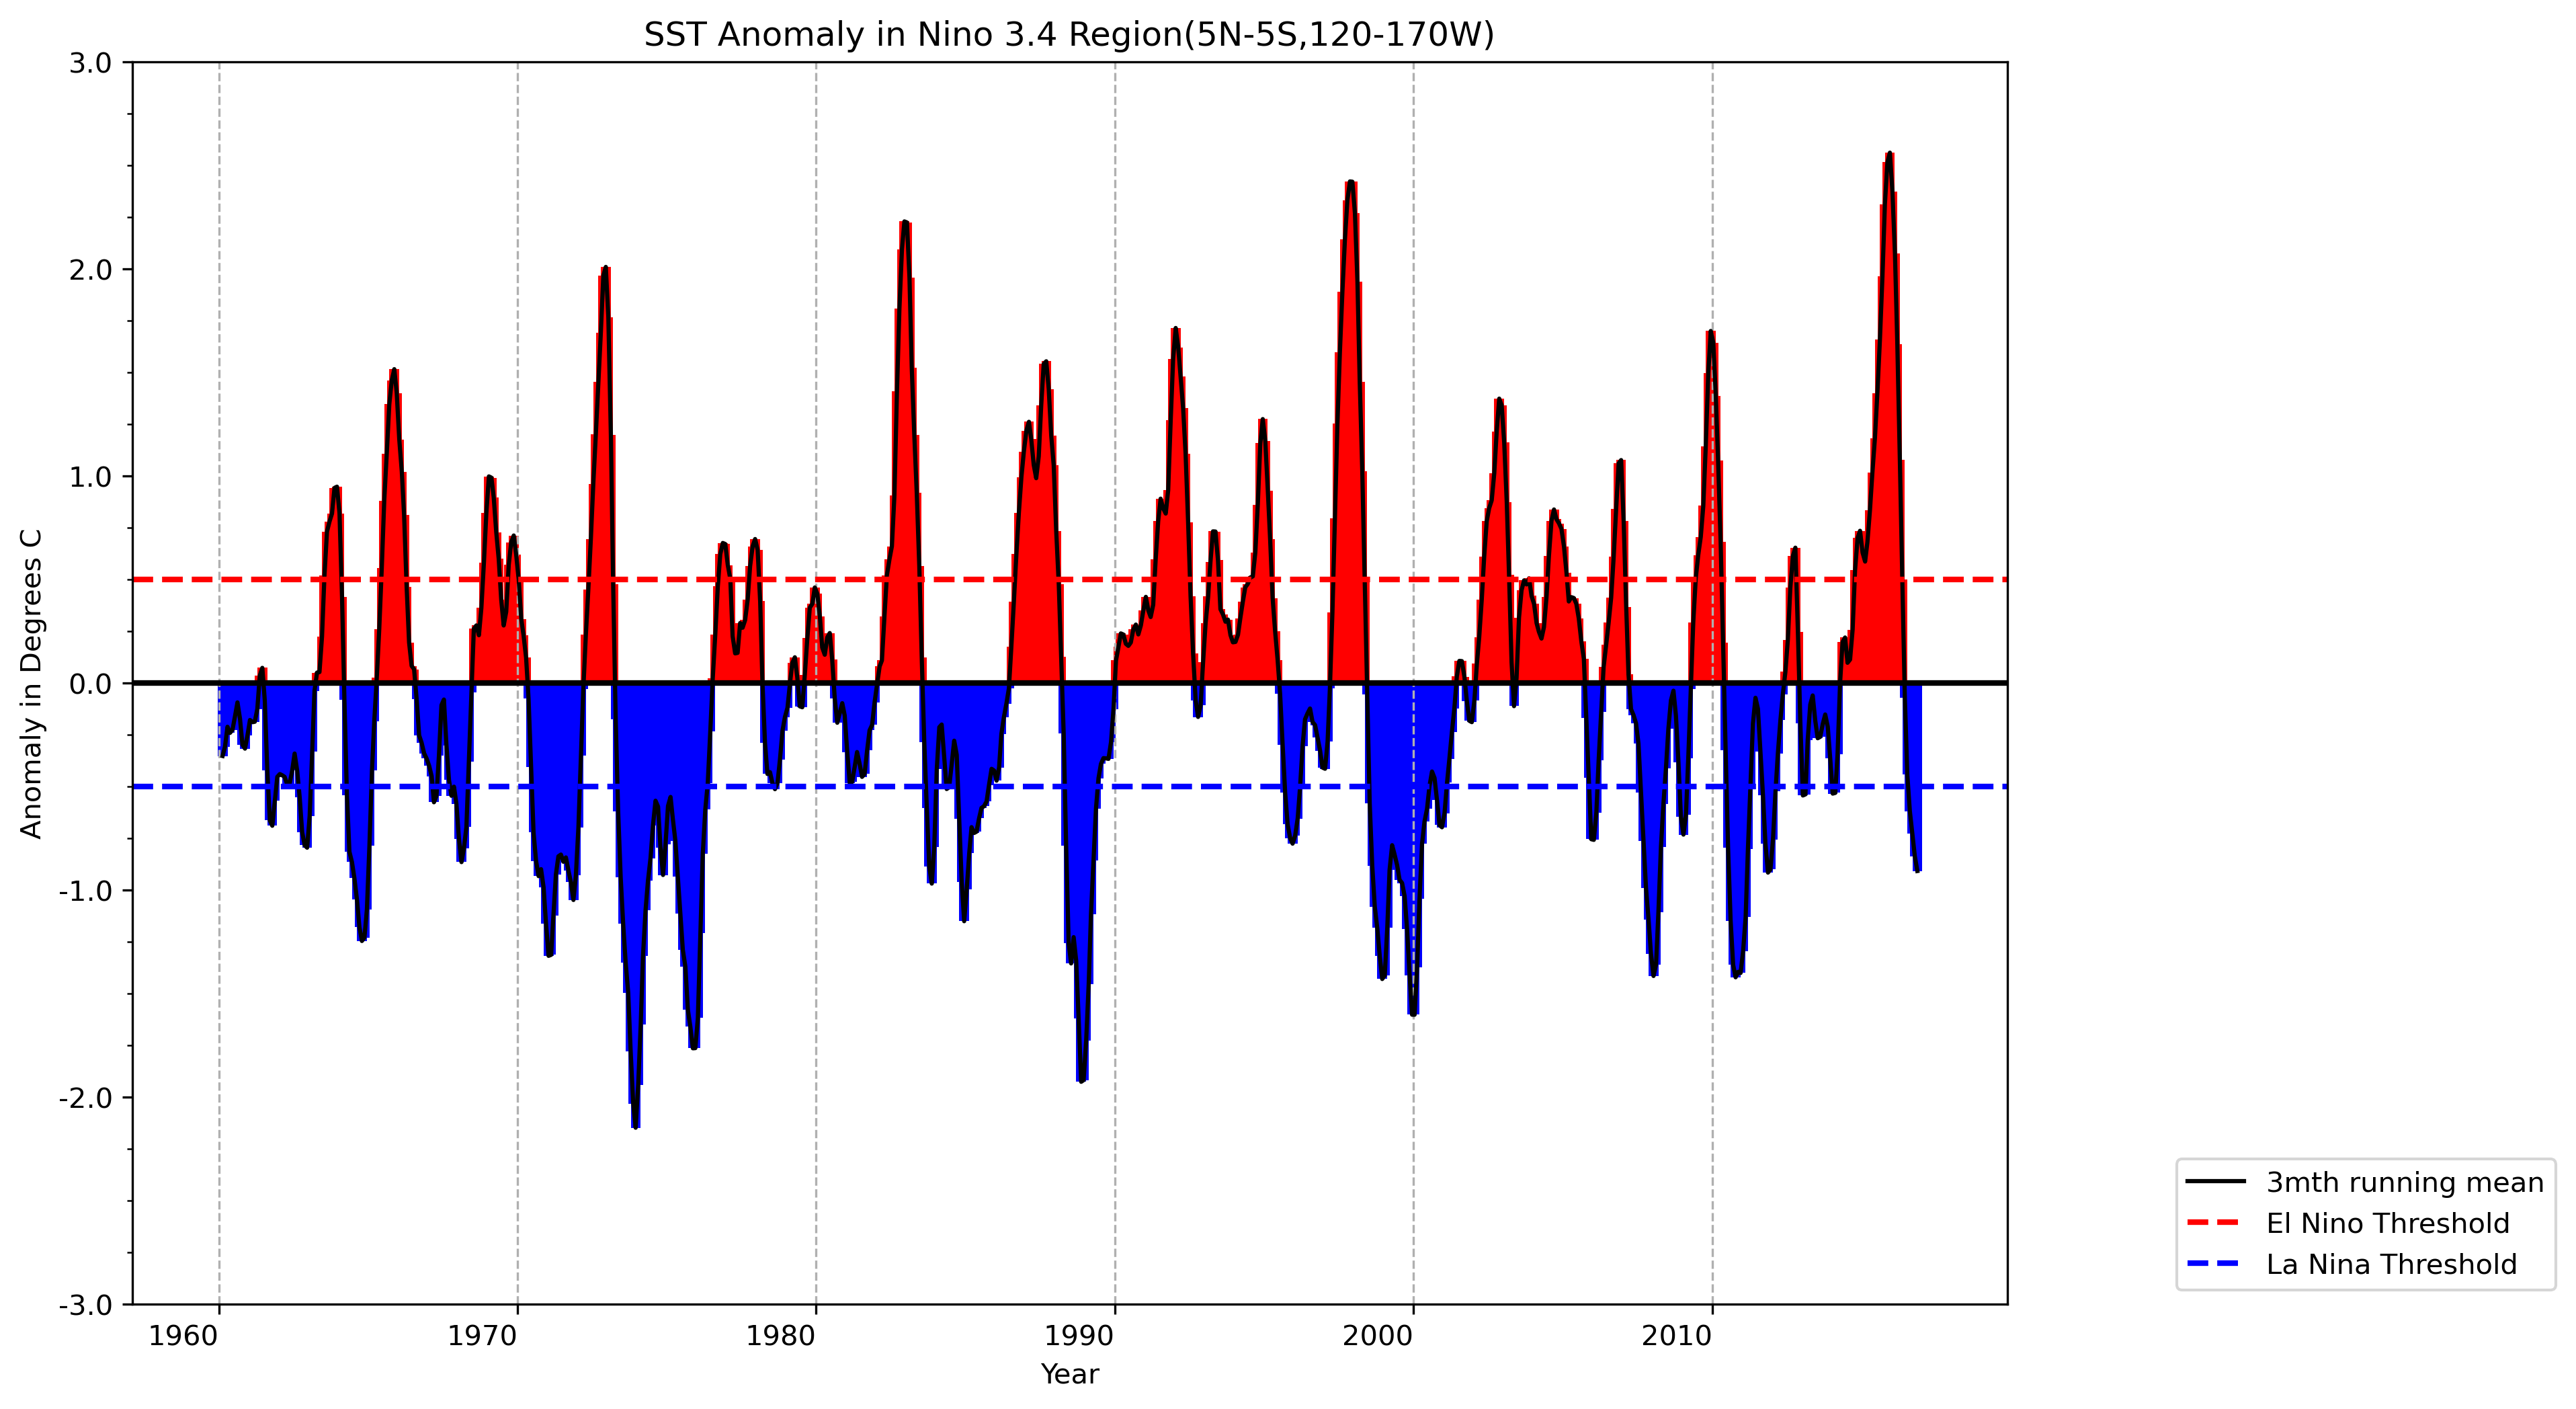

In [21]:
#TA 添加
#1.1

ds = xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")

ds_research = ds.sel(lat = slice(-5,5),lon = slice(190,240))

ds_data_month = ds_research.sst.groupby('time.month')
ds_data_month_avg = ds_data_month.mean(dim = 'time')
anmo_data= ds_data_month - ds_data_month_avg

ds_rolling = anmo_data.rolling(time=3, center=True).mean()
output=ds_rolling.mean(dim=['lat', 'lon'])

#1.2
fig,ax=plt.subplots(figsize=(12,8),dpi=300)
output.plot(color='black',linewidth=1.5,label='3mth running mean')
El_nino_thre,La_nina_thre=0.5,-0.5

plt.axhline(y=El_nino_thre,color='red',linestyle='--',label='El Nino Threshold',linewidth=2)
plt.axhline(y=La_nina_thre,color='blue',linestyle='--',label='La Nina Threshold',linewidth=2)
plt.axhline(y=0,color='black',linestyle='-',linewidth=2)
#将时间转换为标准形式
time_series=ds_rolling['time'].to_series()
#设置直方图颜色
bar_colors=['red' if value>=0 else 'blue' for value in output]
plt.bar(time_series,output,color=bar_colors,zorder=0,width=120)
ax.set_xlabel('Year')
plt.xticks(rotation=0)
ax.set_ylabel('Anomaly in Degrees C')

#设置主要刻度线和次要刻度线

ax.set_ylim(-3.0,3.0)
ax.set_yticks(np.linspace(-3.0,3.0,7))
ax.set_yticks(np.arange(-3.0, 3.25, 0.25), minor=True)
ax.yaxis.set_major_formatter('{:.1f}'.format)
plt.title('SST Anomaly in Nino 3.4 Region(5N-5S,120-170W)')
plt.legend(loc='lower right',bbox_to_anchor=(1.3,0))
plt.grid(axis='x',linestyle='--')

### 第一题代码运行正常，但输出结果有部分错误。第一题不需要进行权重加权平均直接计算平均值，计算异常值即可。第二问图片与样图有些许差异，没有区分EI/La Nina Threshold

### 得分：18/20
### --------------------------------------------------------------------------------------------

## 2. Earth’s energy budget

## 2.1Make a 2D plot of the time-mean TOA longwave, shortwave, and solar radiation for all-sky conditions. Add up the three variables above and verify (visually) that they are equivalent to the TOA net flux.

/tmp/ipykernel_275707/1512264576.py:21: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(grid[2:5, 4:10])


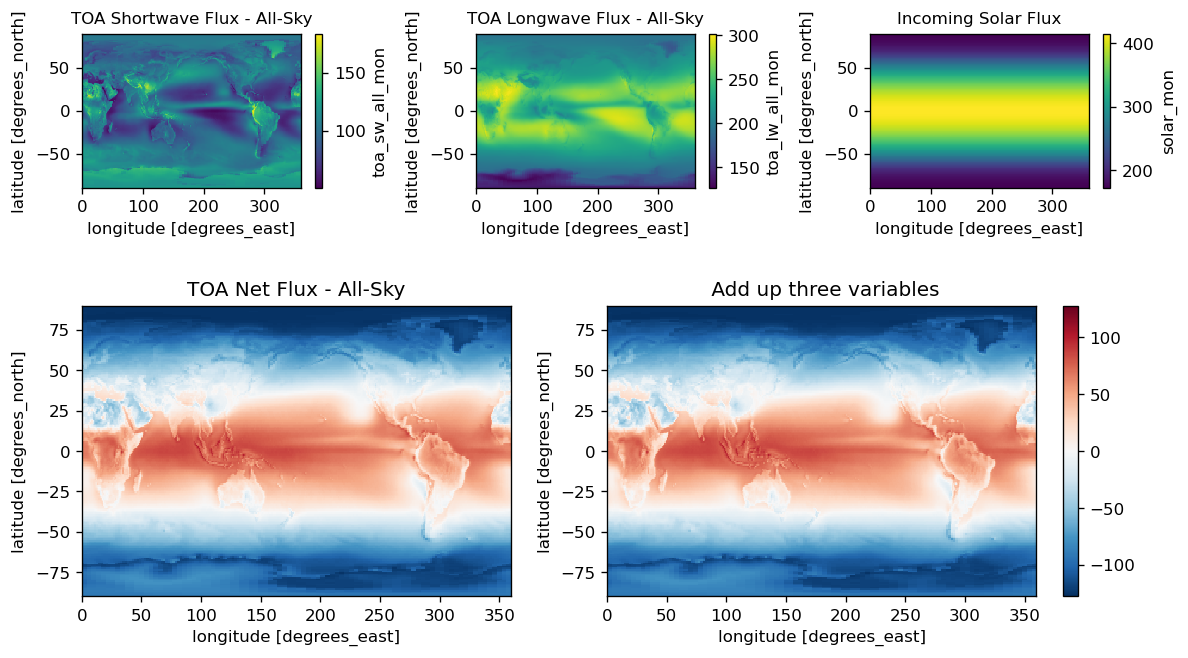

In [22]:
d = xr.open_dataset("../CERES_EBAF-TOA_200003-201701.nc",engine='netcdf4')
fig = plt.figure(figsize=(10,6), dpi=120)
grid = plt.GridSpec(5, 9)  # 3 rows 3 cols

plt.subplot(grid[0:2, 0:3])
ax1 = d.toa_sw_all_mon.mean(dim='time').plot()
plt.title('TOA Shortwave Flux - All-Sky',fontsize=10)

plt.subplot(grid[0:2, 3:6])
ax2 = d.toa_lw_all_mon.mean(dim='time').plot()
plt.title('TOA Longwave Flux - All-Sky',fontsize=10)

plt.subplot(grid[0:2, 6:9])
ax3 = d.solar_mon.mean(dim='time').plot()
plt.title('Incoming Solar Flux',fontsize=10)

plt.subplot(grid[2:5, 0:5])
ax4 = d.toa_net_all_mon.mean(dim='time').plot()
plt.title('TOA Net Flux - All-Sky')

plt.subplot(grid[2:5, 4:10])
ax5 = (d.solar_mon.mean(dim='time') - d.toa_sw_all_mon.mean(dim='time') - d.toa_lw_all_mon.mean(dim='time') ).plot()
plt.title(' Add up three variables')

plt.tight_layout()

## 2.2Calculate and verify that the TOA incoming solar, outgoing longwave, and outgoing shortwave approximately match up with the cartoon above.

<xarray.DataArray ()>
array(1.6990367, dtype=float32)

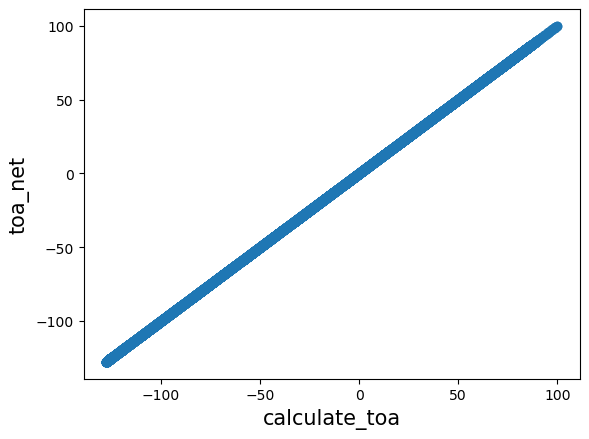

In [11]:
temp=[]
x = d.solar_mon.mean(dim='time') - d.toa_sw_all_mon.mean(dim='time') - d.toa_lw_all_mon.mean(dim='time')
y = d.toa_net_all_mon.mean(dim='time')
a = plt.scatter(x,y)
plt.xlabel('calculate_toa',fontsize=15)
plt.ylabel('toa_net',fontsize=15)
(x-y).sum()

In [24]:
#TA 添加
#计算了地球表面每个格网单元的面积，cos每个格网单元纬度的弧度的余弦值
area = (
    (d['solar_mon'].sel(lat=slice(-90, 90), lon=slice(0, 360)).mean(dim='time') * 0 + 1) *
    np.cos(np.deg2rad(d['solar_mon']['lat'])) *
    np.deg2rad(d['solar_mon']['lon'] - d['solar_mon']['lon'][0]) *
    6371.009 ** 2 * 1e6)

# 计算总值
earth_area = area.sum(dim=['lat', 'lon'])

# 计算每一个背景辐射
solar_radiation = (
    d['solar_mon'].sel(lat=slice(-90, 90), lon=slice(0, 360)).mean(dim='time') * area
)
lw_radiation = (
    d['toa_lw_all_mon'].sel(lat=slice(-90, 90), lon=slice(0, 360)).mean(dim='time') * area
)
sw_radiation = (
    d['toa_sw_all_mon'].sel(lat=slice(-90, 90), lon=slice(0, 360)).mean(dim='time') * area
)

# 计算总辐射
total_solar = solar_radiation.sum(dim=['lat', 'lon'])
total_lw = lw_radiation.sum(dim=['lat', 'lon'])
total_sw = sw_radiation.sum(dim=['lat', 'lon'])

print('Total incoming solar radiation:', int(total_solar.values / earth_area), 'W/m^2')
print('Total outgoing longwave radiation:', int(total_lw.values / earth_area), 'W/m^2')
print('Total outgoing shortwave radiation:', int(total_sw.values / earth_area), 'W/m^2')


Total incoming solar radiation: 340 W/m^2
Total outgoing longwave radiation: 240 W/m^2
Total outgoing shortwave radiation: 98 W/m^2


## 2.3Calculate and plot the total amount of net radiation in each 1-degree latitude band. Label with correct units.

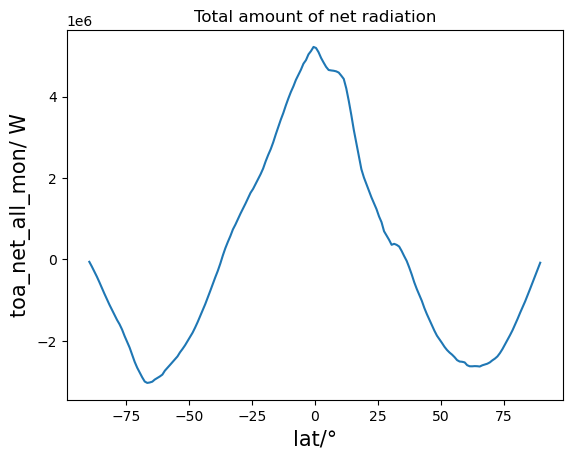

In [12]:
weights = np.cos(np.deg2rad(d.lat))
net_weighted = d.toa_net_all_mon.weighted(weights)
region_mean = net_weighted.sum(dim=['lon','time']).plot()
plt.xlabel('lat/°',fontsize=15)
plt.ylabel('toa_net_all_mon/ W',fontsize=15)
plt.title('Total amount of net radiation')
plt.show()

## 2.4Calculate and plot composites of time-mean outgoing shortwave and longwave radiation for low and high cloud area regions. Here we define low cloud area as ≤25% and high cloud area as ≥75%. Your results should be 2D maps.

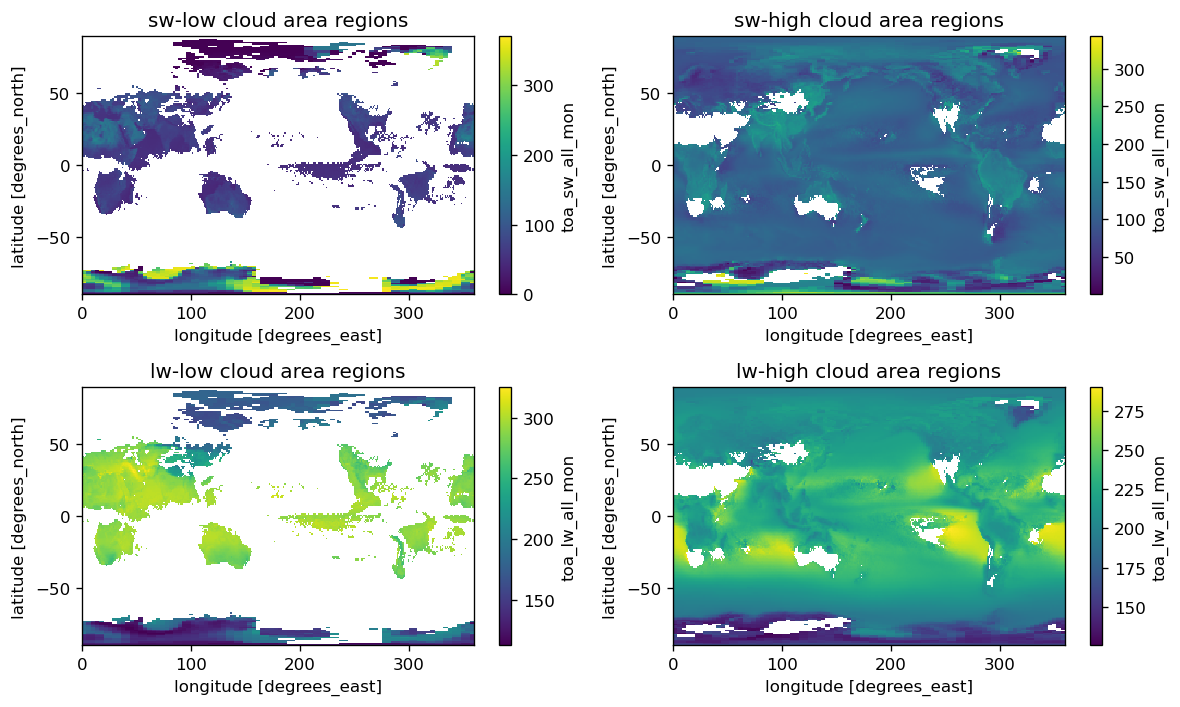

In [13]:
fig = plt.figure(figsize=(10,6), dpi=120)
grid = plt.GridSpec(4, 4)  # 4 rows 4 cols
plt.subplot(grid[0:2, 0:2])
d.toa_sw_all_mon.where((d.cldarea_total_daynight_mon<=25)).mean(dim='time').plot()
plt.title('sw-low cloud area regions')
plt.subplot(grid[0:2, 2:4])
d.toa_sw_all_mon.where((d.cldarea_total_daynight_mon>=75)).mean(dim='time').plot()
plt.title('sw-high cloud area regions')
plt.subplot(grid[2:4, 0:2])
d.toa_lw_all_mon.where((d.cldarea_total_daynight_mon<=25)).mean(dim='time').plot()
plt.title('lw-low cloud area regions')
plt.subplot(grid[2:4, 2:4])
d.toa_lw_all_mon.where((d.cldarea_total_daynight_mon>=75)).mean(dim='time').plot()
plt.title('lw-high cloud area regions')

plt.tight_layout()

## 2.5Calculate the global mean values of shortwave and longwave radiation, composited in high and low cloud regions. What is the overall effect of clouds on shortwave and longwave radiation?

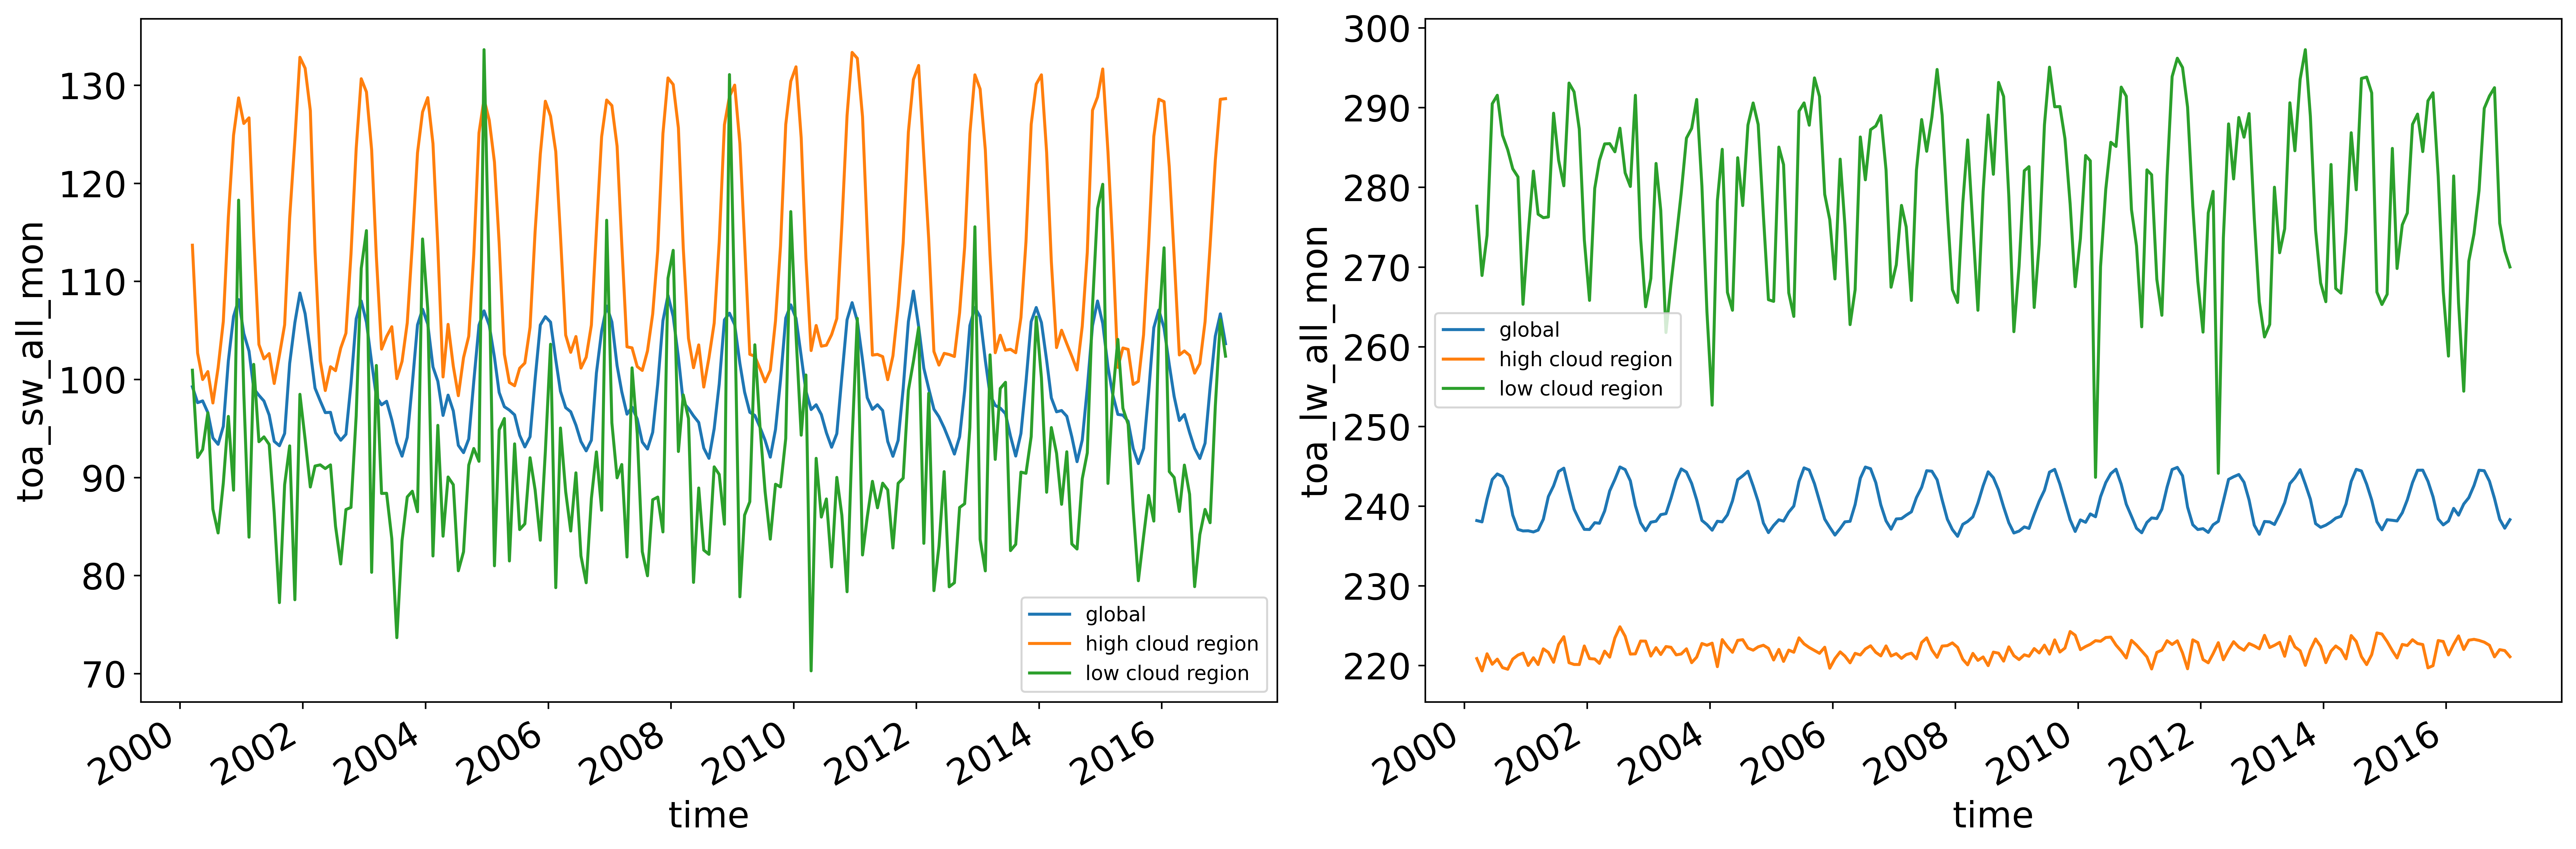

In [14]:
fig = plt.figure(figsize=(18,6), dpi=600)
grid = plt.GridSpec(1, 2)  # 1 rows 2 cols
plt.subplot(grid[0, 0])
d.toa_sw_all_mon.weighted(weights).mean(dim=['lon','lat']).plot(label='global')
d.toa_sw_all_mon.where((d.cldarea_total_daynight_mon>=75)).weighted(weights).mean(dim=['lon','lat']).plot(label='high cloud region')
d.toa_sw_all_mon.where((d.cldarea_total_daynight_mon<=25)).weighted(weights).mean(dim=['lon','lat']).plot(label='low cloud region')
plt.legend(loc='best')
plt.xlabel('time',fontsize=18)
plt.ylabel('toa_sw_all_mon',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.subplot(grid[0, 1])
d.toa_lw_all_mon.weighted(weights).mean(dim=['lon','lat']).plot(label='global')
d.toa_lw_all_mon.where((d.cldarea_total_daynight_mon>=75)).weighted(weights).mean(dim=['lon','lat']).plot(label='high cloud region')
d.toa_lw_all_mon.where((d.cldarea_total_daynight_mon<=25)).weighted(weights).mean(dim=['lon','lat']).plot(label='low cloud region')
plt.legend(loc='best')
plt.xlabel('time',fontsize=18)
plt.ylabel('toa_lw_all_mon',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()

### 第二题代码运行正常，可以输出部分正确结果和图片，报告中也展示了代码思路。第二问因为不同位置的栅格面积不同，应该根据先计算不同纬度的权重，再计算长波段短波段和太阳辐射的加权均值；第三问量级偏小，辐射值要与网格面积相乘。
### 得分：28/30

# 3.Explore a netCDF dataset

## 3.1

Text(0, 0.5, 'temperature[℃]')

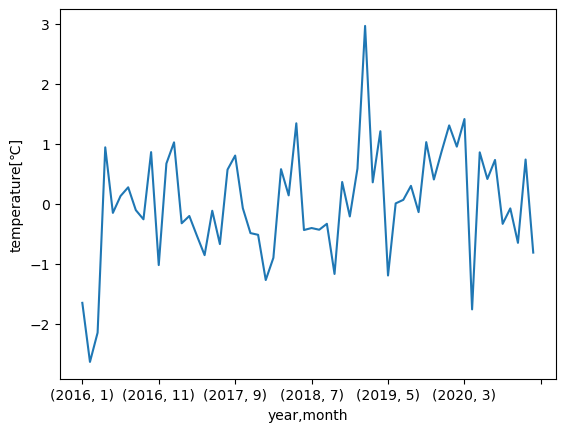

In [26]:
T = xr.open_dataset("2016-2020-T.nc",engine="netcdf4")
T.t2m.mean(dim=('latitude', 'longitude'))
weight = np.cos(np.deg2rad(T.latitude))
T_weighted = T.t2m.weighted(weight)
region_mean = T_weighted.mean(dim=('longitude','latitude'))
a = region_mean.values
index = pd.date_range('2016-01-01', periods=1827, freq='D')
k = 0
t_day = np.zeros(1827)
for i in range(0,1827):
    t_day[i]=a[k:k+24].mean()
    k+=24
tempdf = pd.DataFrame(t_day,columns=['t2m'])
tempdf['date'] = index
tempdf['year'] = pd.DatetimeIndex(tempdf.date).year
tempdf['month'] = pd.DatetimeIndex(tempdf.date).month
t_month = tempdf.groupby(['year','month']).mean()


monthly_T = region_mean.groupby('time.month').mean()
sea = np.zeros(60)
for i in range(0,5):
    sea[12*i:12*i+12] = monthly_T

certain = t_month['t2m'] - sea
certain.plot()
plt.ylabel('temperature[℃]')

## 3.2

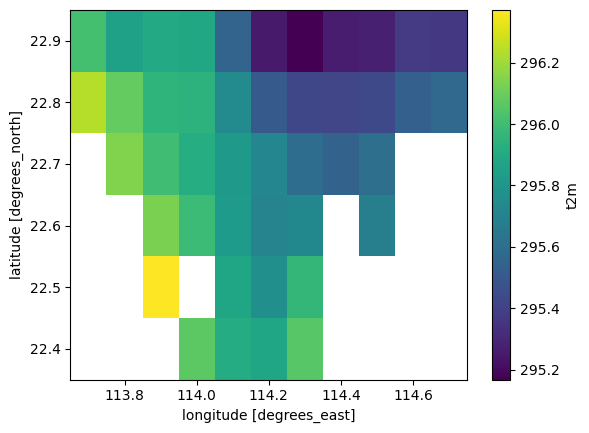

In [27]:
T.t2m.mean(dim='time').plot()

/home/zhangp/anaconda3/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


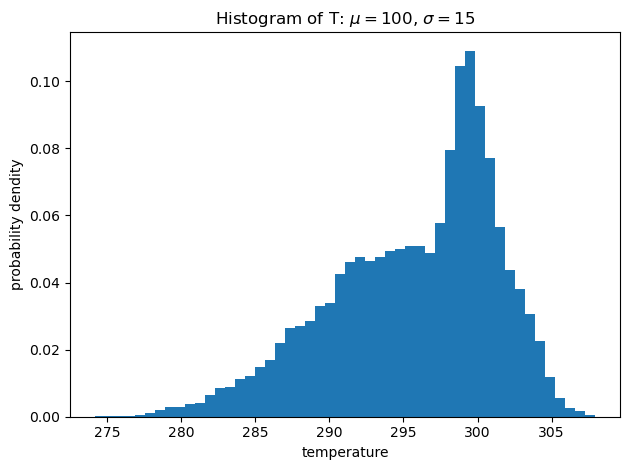

In [28]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy.stats import norm
np.random.seed(0)

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = a

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1)

# Tweak spacing to prevent clipping of ylabel
plt.title('Histogram of T: $\mu=100$, $\sigma=15$')
plt.xlabel('temperature')
plt.ylabel('probability dendity')
fig.tight_layout()
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7efda8a55a50>,
 'caps': [<matplotlib.lines.Line2D at 0x7efda8a55f90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7efda8a557b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7efda8a564d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7efda8a56770>],
 'means': []}

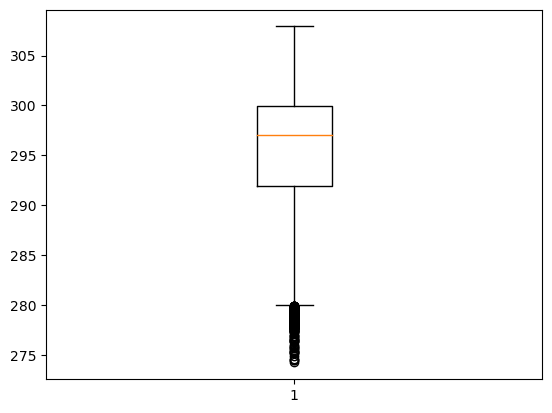

In [29]:
data = a
# basic plot
plt.boxplot(data)

Text(0, 0.5, 't2m[K]')

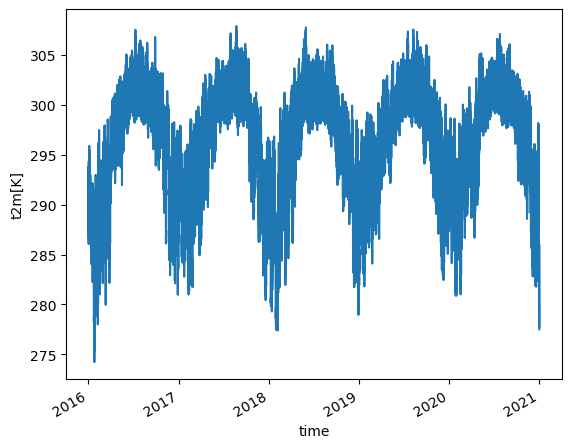

In [20]:
T_weighted.mean(dim=('longitude','latitude')).plot()
plt.ylabel('t2m[K]')

Text(0, 0.5, 't2m[K]')

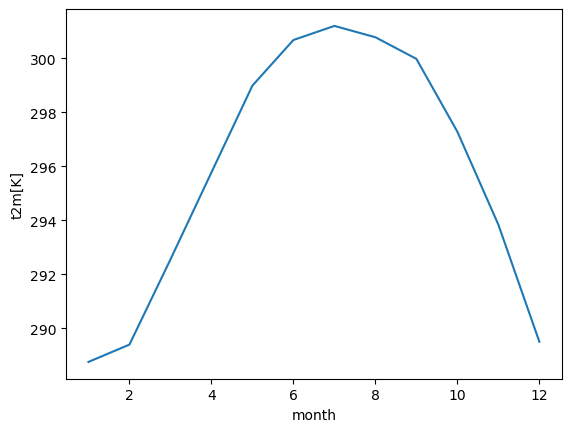

In [21]:
monthly_T.plot()
plt.ylabel('t2m[K]')

### 第三题代码运行正常，可以输出正确结果和图片，报告中也展示了输出内容和结果。但没有对结果进行分析
### 得分：9/10
### --------------------------------------------------------------------------------------------